In [1]:
import numpy as np
import torch
from torch.utils.data import random_split
from tqdm import tqdm

from dataloader import RefCOCOg
from vgmodels.mdetr import MDETRvg
from vgmodels.yoloclip import YoloClip

if torch.cuda.is_available():
    device = torch.device("cuda")  # CUDA GPU
    print("[INFO] GPU found, using GPU.")
elif torch.has_mps:
    device = torch.device("mps")  # Apple Silicon
    print("[INFO] MPS found, using MPS.")
else:
    device = torch.device("cpu")
    print("[INFO] No GPU found, using CPU instead.")


[INFO] MPS found, using MPS.


In [2]:
dataset = RefCOCOg(ds_path='dataset/refcocog')

train_split = 0.8

train_ds, test_ds = random_split(dataset, [int(train_split * len(dataset)), len(dataset) - int(train_split * len(dataset))])

print(f"Dataset Size: {len(dataset)}\n---")
print(f"Train size {len(train_ds)}")
print(f"Test Size: {len(test_ds)}")


Dataset Size: 49822
---
Train size 39857
Test Size: 9965


In [3]:
yoloclip = YoloClip(device=device, quiet=True, categories=dataset.categories)

mdetr = MDETRvg(device=device, quiet=True, categories=dataset.categories)


Using cache found in /Users/azel/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-3-27 Python-3.9.6 torch-2.0.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


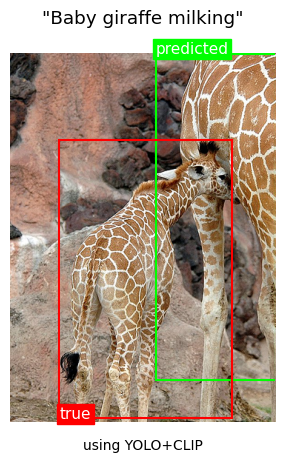

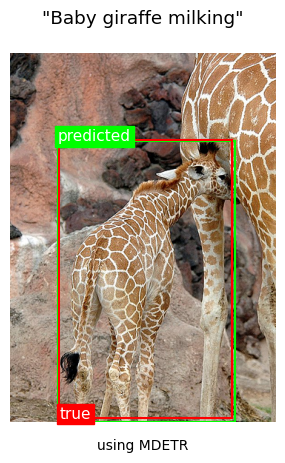

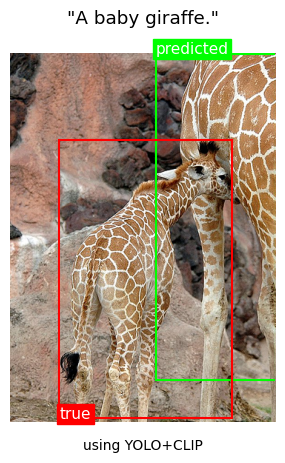

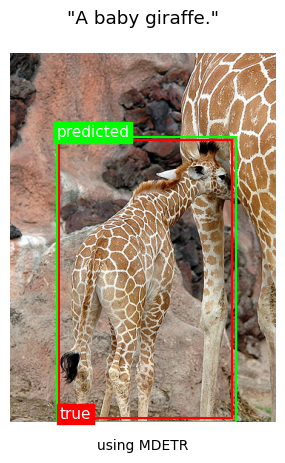

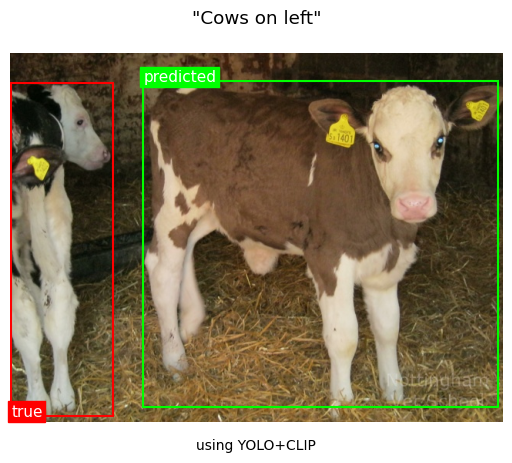

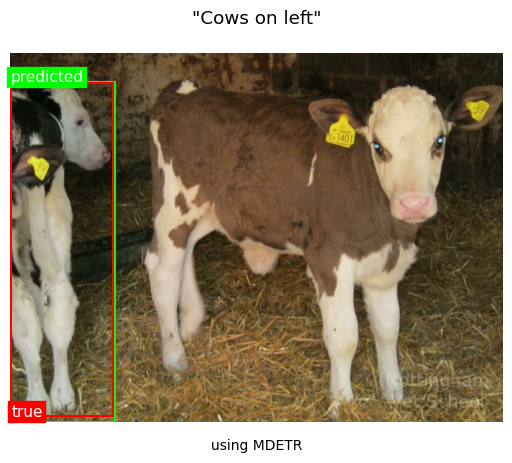

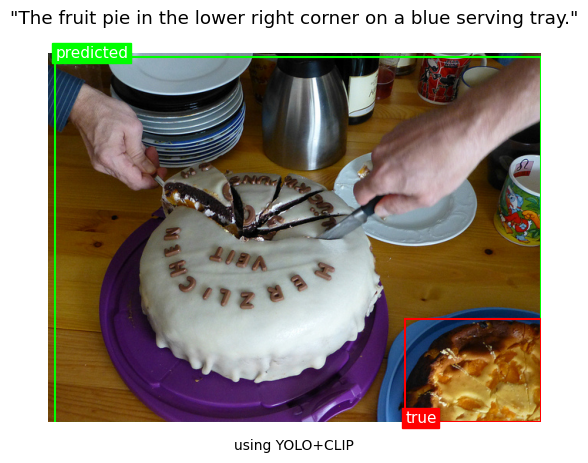

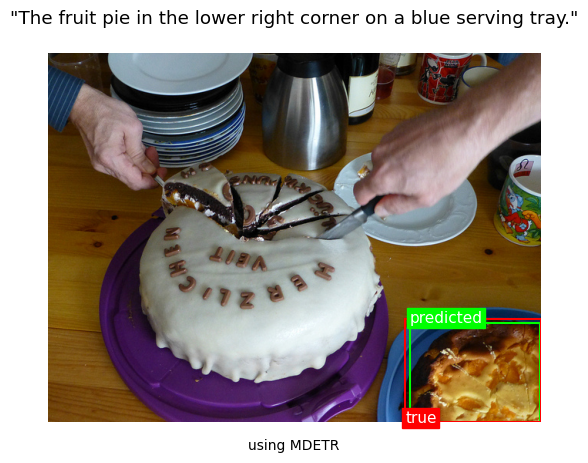

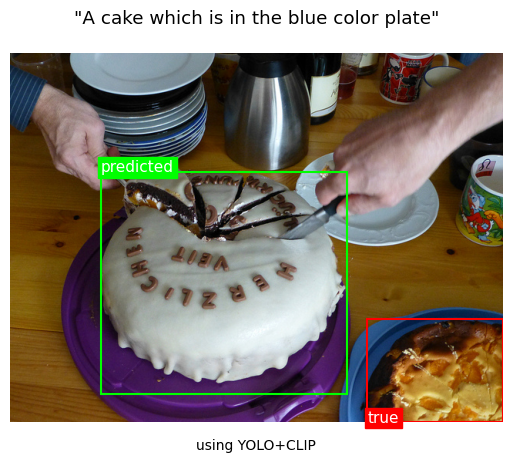

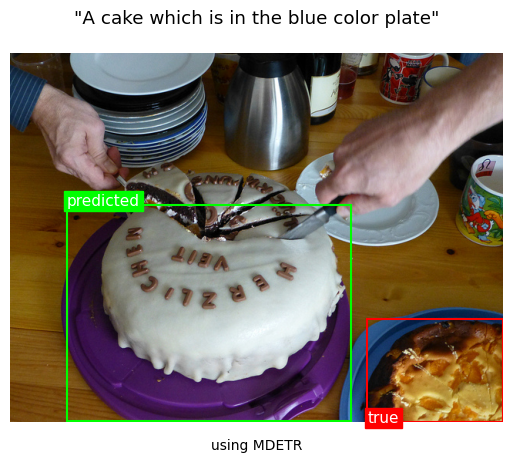

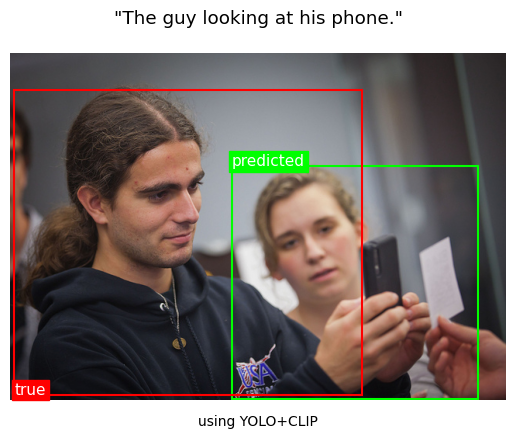

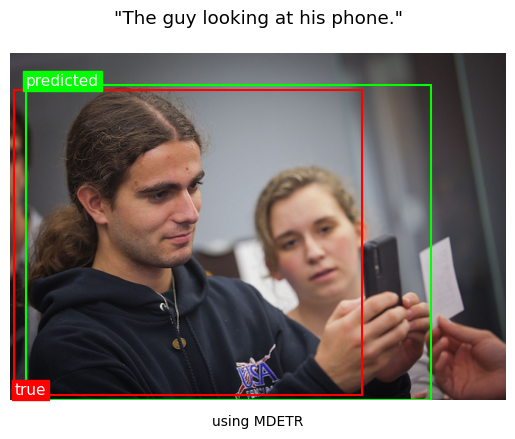

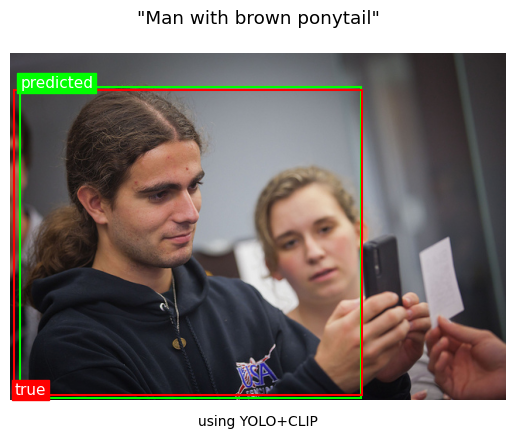

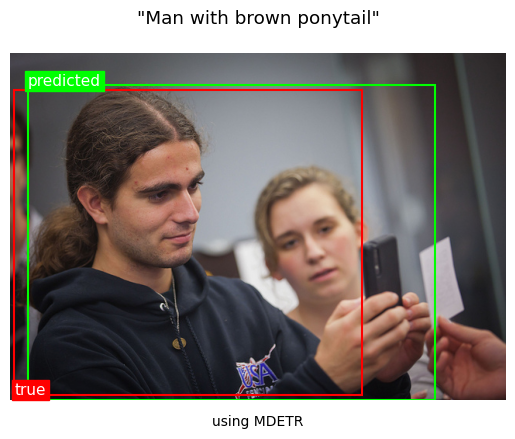

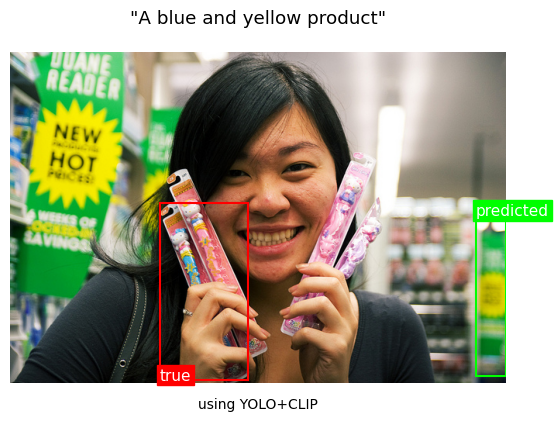

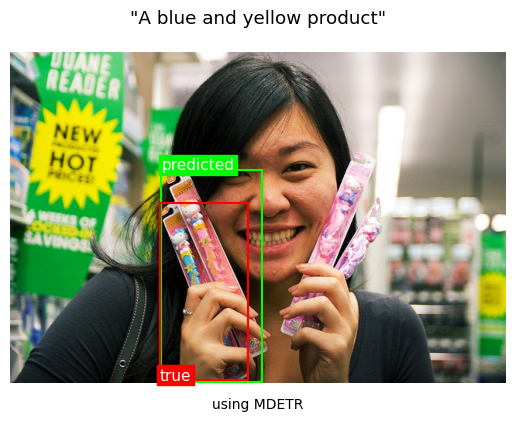

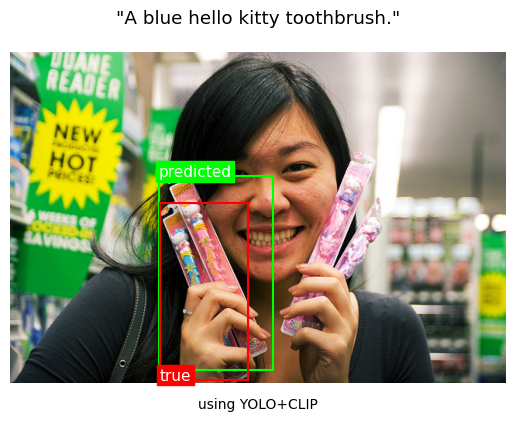

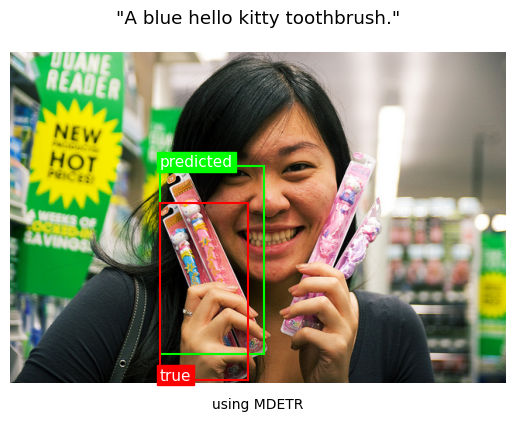

In [4]:
%matplotlib inline

for n in range(5):
    idx = np.random.randint(0, len(dataset))
    sample = dataset[idx]

    for sentence in sample.sentences:
        yoloclip(sample, sentence, show=True)
        mdetr(sample, sentence, show=True)


---

In [ ]:
yoco_model = YoloClip(device=device, categories=dataset.categories)

euclidean_dists, cosine_sims, iou_scores, recall_scores = list(), list(), list(), list()
euclidean_dists2, cosine_sims2, iou_scores2, recall_scores2 = list(), list(), list(), list()

#for sample in tqdm(test_ds, desc=f"Testing on {len(test_ds)} images"):

for idx in tqdm(range(100), desc=f"Testing on {100} images"):
    sample = test_ds[idx]

    for sentence in sample.sentences:

        try:
            sc1 = yoloclip(sample, sentence, show=False)
            sc2 = mdetr(sample, sentence, show=False)
        except ValueError:
            continue

        # # Semantic Similarity
        # euclidean_dists.append(sc["euclidean"])
        # cosine_sims.append(sc["cosine"])

        # Localization Accuracy
        iou_scores.append(sc1["iou"])
        iou_scores2.append(sc2["iou"])

        # # Grounding Accuracy
        # recall_scores.append(sc["recall"])

# print(f"Avg. Euclidean Distance: {np.mean(euclidean_dists)}")
# print(f"Avg. Cosine Similarity: {np.mean(cosine_sims)}")
print(f"Avg. YOLO+CLIP IoU: {np.mean(iou_scores)}")
print(f"Avg. MDETR IoU: {np.mean(iou_scores2)}")
# print(f"Avg. Recall: {np.mean(recall_scores)}")


---